# Task 1.1: Import the libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

from sklearn import metrics
from sklearn.datasets import make_circles

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Task 1.2: Set seed value to 42

# Task 1.3: Define the function

In [74]:
#Setting the seed value to 42
np.random.seed(seed=42)

#Defining the function
def PointsInCircum(r,n=100):
    return[(math.cos(2*math.pi/n*x)*r + np.random.normal(-20,20), math.sin(2*math.pi/n*x)*r + np.random.normal(-20,20)) for x in range (1,n+1)]

# Task 1.3.1: create the sets of data points in the form of three concentric circles. 

In [75]:
Data=pd.DataFrame(PointsInCircum(400,900))
Data=Data.append(PointsInCircum(250,600))
Data=Data.append(PointsInCircum(90,200))

In [76]:
Data

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
195,37.750393,-47.336480
196,68.121120,-29.983060
197,109.273249,-53.370906
198,80.067375,6.955294


# Task 1.3.2: Add some noise to the data by applying the following code snippet:

In [77]:
Data=Data.append([(np.random.randint(-500,500),np.random.randint(-500,500)) for i in range (300)])

In [78]:
Data

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
295,-34.000000,-196.000000
296,484.000000,-357.000000
297,-390.000000,-269.000000
298,190.000000,83.000000


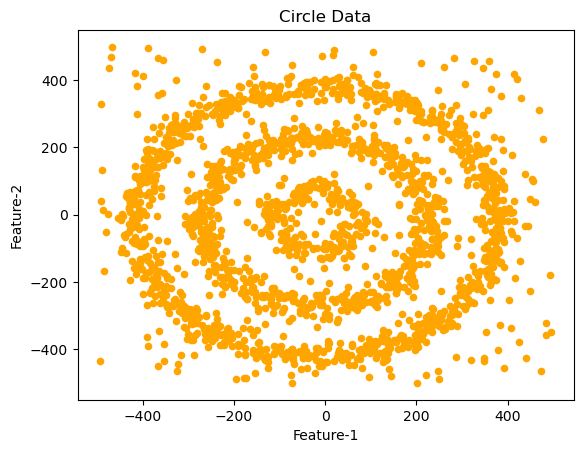

In [19]:
plt.scatter(Data[0],Data[1], s=20, c='orange')
plt.title('Circle Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

# Task 2.1: Apply the KMeans algorithm to the cluster data  

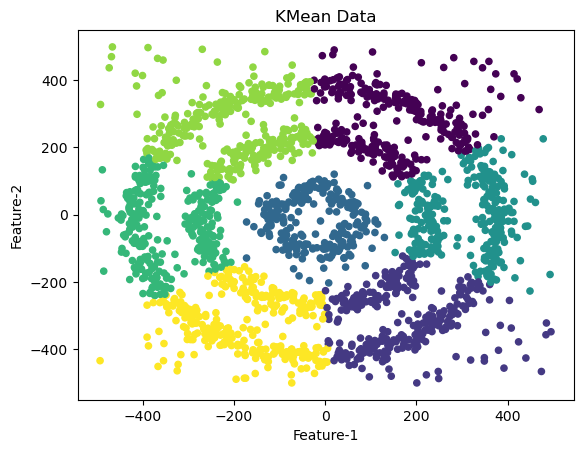

In [43]:
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=7)
km_model.fit(Data[[0,1]])
Data['km_model.labels_']=km_model.labels_
plt.scatter(Data[0],Data[1],s=20,c=Data['km_model.labels_'])
plt.title('KMean Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [44]:
Data

,0,1,km_model.labels_
0,389.924535,-19.972782,3
1,392.914780,16.045469,3
2,375.229206,-16.305771,3
3,411.428302,6.517350,3
4,370.366843,4.811000,3
...,...,...,...
295,-34.000000,-196.000000,2
296,484.000000,-357.000000,1
297,-390.000000,-269.000000,6
298,190.000000,83.000000,3


In [9]:
metrics.silhouette_score(Data,Data['km_model.labels_'])

0.39628689685573154

Silhoutte score for the KMeans algorithm is 0.3962

# Task 2.2: Apply the Agglomerative Clustering algorithm

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,10):
    hc=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_hc=hc.fit_predict(Data)
    print(k,silhouette_score(Data,y_hc))

2 0.3197086108736964
3 0.29858284374333505
4 0.3112483918802322
5 0.3136782823442278
6 0.3485004234236395
7 0.3556794331609525
8 0.35245964270151064
9 0.32669663263216014


Here we are getting the best K value as 7=0.356795

In [16]:
hc=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward') # here we train the model with best K value i.e 5
y_hc=hc.fit_predict(Data)

In [17]:
Data

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
295,-34.000000,-196.000000
296,484.000000,-357.000000
297,-390.000000,-269.000000
298,190.000000,83.000000


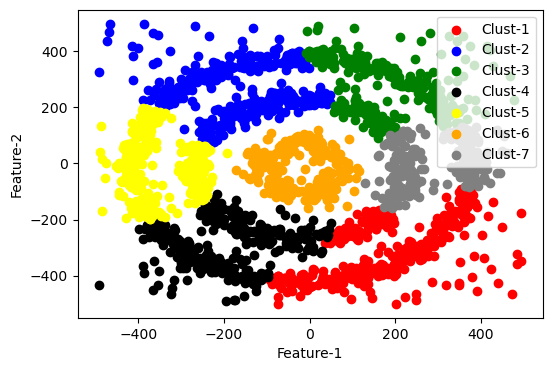

In [18]:
Data=Data.to_numpy()
plt.figure(figsize=(6,4))
plt.scatter(Data[y_hc==0,0],Data[y_hc==0,1],color='red',label='Clust-1')
plt.scatter(Data[y_hc==1,0],Data[y_hc==1,1],color='blue',label='Clust-2')
plt.scatter(Data[y_hc==2,0],Data[y_hc==2,1],color='green',label='Clust-3')
plt.scatter(Data[y_hc==3,0],Data[y_hc==3,1],color='black',label='Clust-4')
plt.scatter(Data[y_hc==4,0],Data[y_hc==4,1],color='yellow',label='Clust-5')
plt.scatter(Data[y_hc==5,0],Data[y_hc==5,1],color='orange',label='Clust-6')
plt.scatter(Data[y_hc==6,0],Data[y_hc==6,1],color='gray',label='Clust-7')
plt.legend()
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

# Task 2.3: Apply the default DBSCAN (without hyperparaeters) algorithm to cluster the data and plot the resulting luster.

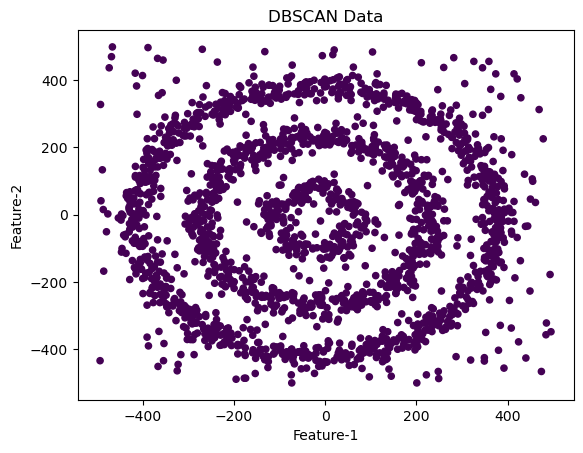

In [71]:
# DBSCAN create only one cluster.
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()   # DBSCAN is hyper-parameter here we are using the default setting of DBSCAN
dbscan.fit(Data[[0,1]])
Data['dbscan.labels_']=dbscan.labels_
plt.scatter(Data[0],Data[1],s=20,c=Data['dbscan.labels_'])
plt.title('DBSCAN Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

# Task 3: Plot the K-distnace graph to evaluate the optimum eps value

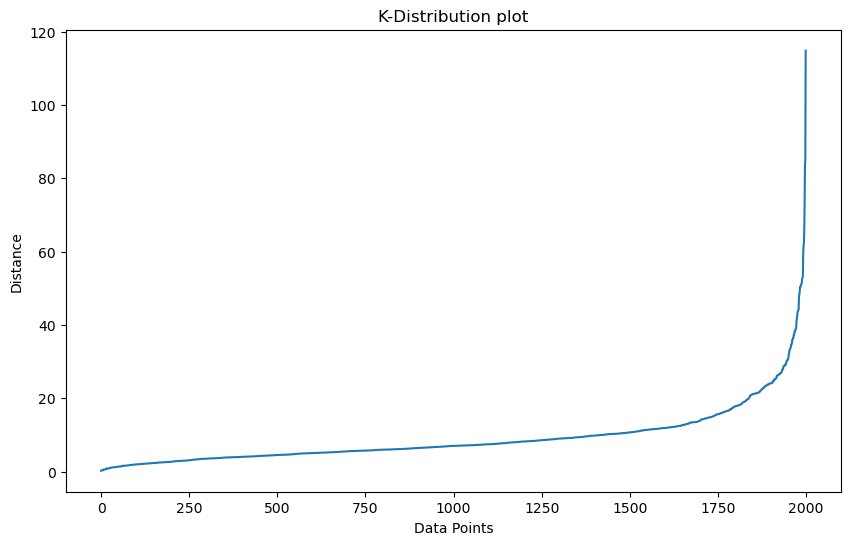

In [79]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=7)
nrbr=neigh.fit(Data[[0,1]])
distance, indices=nrbr.kneighbors(Data[[0,1]])

# plotting the k-distance

distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.figure(figsize=(10,6))
plt.plot(distance)
plt.title('K-Distribution plot')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Here we will take turning point as distance, here it is 30.

In [80]:
eps=30     # here e took 30 as distance from above graph
for min_sample in [5,6,7,8,9,10,11,12,13,14,15]:
    clus=DBSCAN(eps=eps,min_samples=min_sample)   # here we are using the hyper-parameter i.e we are not using default values we are giving it manually as per our choice
    clus_lbl=clus.fit_predict(Data)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    resuls=list(zip(ii,y1[ii]))
    print('eps =',eps,'min_sample =',min_sample, 'clustered =', resuls)

eps = 30 min_sample = 5 clustered = [(1, 138), (2, 984), (3, 662), (4, 216)]
eps = 30 min_sample = 6 clustered = [(1, 143), (2, 982), (3, 660), (4, 215)]
eps = 30 min_sample = 7 clustered = [(1, 149), (2, 978), (3, 658), (4, 215)]
eps = 30 min_sample = 8 clustered = [(1, 157), (2, 973), (3, 656), (4, 214)]
eps = 30 min_sample = 9 clustered = [(1, 163), (2, 970), (3, 654), (4, 213)]
eps = 30 min_sample = 10 clustered = [(1, 174), (2, 964), (3, 650), (4, 212)]
eps = 30 min_sample = 11 clustered = [(1, 187), (2, 809), (3, 149), (4, 644), (5, 211)]
eps = 30 min_sample = 12 clustered = [(1, 196), (2, 370), (3, 435), (4, 147), (5, 642), (6, 210)]
eps = 30 min_sample = 13 clustered = [(1, 222), (2, 300), (3, 262), (4, 168), (5, 146), (6, 60), (7, 300), (8, 334), (9, 208)]
eps = 30 min_sample = 14 clustered = [(1, 243), (2, 296), (3, 132), (4, 127), (5, 167), (6, 146), (7, 61), (8, 298), (9, 332), (10, 35), (11, 53), (12, 75), (13, 35)]
eps = 30 min_sample = 15 clustered = [(1, 264), (2, 172),

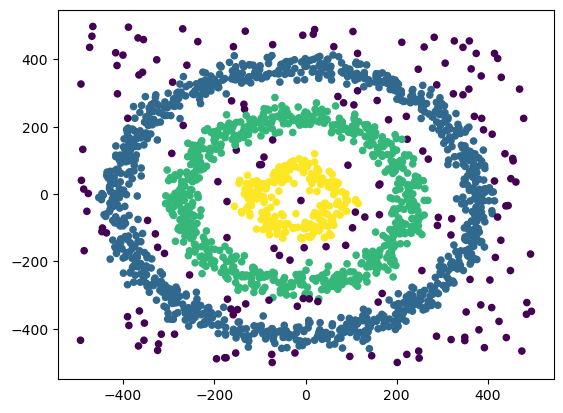

In [81]:
db_model=DBSCAN(eps=30,min_samples=10)
db_model.fit(Data[[0,1]])
Data['db_model.labels_']=db_model.labels_
plt.scatter(Data[0],Data[1], s=20,c=Data['db_model.labels_'])

In [82]:
Data

,0,1,db_model.labels_
0,389.924535,-19.972782,0
1,392.914780,16.045469,0
2,375.229206,-16.305771,0
3,411.428302,6.517350,0
4,370.366843,4.811000,0
...,...,...,...
295,-34.000000,-196.000000,-1
296,484.000000,-357.000000,-1
297,-390.000000,-269.000000,0
298,190.000000,83.000000,1


In [84]:
db_model.labels_

array([ 0,  0,  0, ...,  0,  1, -1], dtype=int64)

In [87]:
metrics.silhouette_score(Data,Data['db_model.labels_'])

-0.12830242187457216

# Here we can see Silhouette Score for the KMeans is 0.3962

# Here we can see Silhouette Score for the Agglomerative Clustering is 0.3567

# Here we can see Silhouette Score for the DBSCAN is -0.1283

# Interpretation:

# Here we can see the best K is 7 as we can see the value as 0.3962 and from all the above observation in the KMeans algorithm we are getting 7 different Clusters also in Agglomeritive algorithm we are getting 7 different clusters. But in DBSCAN Algorithm er are getting 3 different clusters. Hence we can say that DBSCAN algorithm is best for the Density-Based Clustering.